In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random

pd.options.display.max_columns = 2000
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
del df['id']

In [4]:
dummy_df = pd.get_dummies(df)

In [5]:
y = dummy_df['loss'].values
del dummy_df['loss']

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
zscore_df = (dummy_df - dummy_df.mean()) / dummy_df.std()
zscore_df = zscore_df.values

In [8]:
def get_sorted_distances_and_index(data, target):
    distances = cosine_similarity(target, data)[0]
    orders = np.argsort(-distances)
    return distances[orders], orders

In [9]:
def get_estimations(data, target, y, k):
    num_samples = len(data)
    distances, orders = get_sorted_distances_and_index(data, target)
    start, end = 0, k
    estimates = []
    while end < num_samples:
        group_index = orders[start:end]
        group_distances = distances[start:end]
        group_y = y[group_index]
        weights = group_distances / group_distances.sum()
        estimated_y = weights @ group_y
        estimates.append(estimated_y)
        start = end
        end += k
    return estimates
    #return group_index, group_distances, group_y, weights

In [10]:
def get_estimation_errors(data, target, y, target_y, k):
    estimations = get_estimations(data, target, y, k)
    return estimations - target_y

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
def get_sample_errors(data, y, samples, k=1000):
    errors = []
    for idx, i in enumerate(samples):
        if idx % 100 == 0:
            print('Estimating training data {0}, {0}/{1}'.format(idx, len(samples)))
        training_data_index = [j for j in range(len(y)) if j != i]
        errors_ = get_estimation_errors(data[training_data_index], 
                                        data[i], 
                                        y[training_data_index],
                                        y[i],
                                        10000)
        errors.append(errors_)
    return errors

In [48]:
samples = random.sample(range(len(zscore_df)), 5000)

In [49]:
errors = get_sample_errors(zscore_df, y, samples)

Estimating training data 0, 0/5000
Estimating training data 100, 100/5000
Estimating training data 200, 200/5000
Estimating training data 300, 300/5000
Estimating training data 400, 400/5000
Estimating training data 500, 500/5000
Estimating training data 600, 600/5000
Estimating training data 700, 700/5000
Estimating training data 800, 800/5000
Estimating training data 900, 900/5000
Estimating training data 1000, 1000/5000
Estimating training data 1100, 1100/5000
Estimating training data 1200, 1200/5000
Estimating training data 1300, 1300/5000
Estimating training data 1400, 1400/5000
Estimating training data 1500, 1500/5000
Estimating training data 1600, 1600/5000
Estimating training data 1700, 1700/5000
Estimating training data 1800, 1800/5000
Estimating training data 1900, 1900/5000
Estimating training data 2000, 2000/5000
Estimating training data 2100, 2100/5000
Estimating training data 2200, 2200/5000
Estimating training data 2300, 2300/5000
Estimating training data 2400, 2400/5000

In [79]:
err = np.array(errors)

In [80]:
err = np.sqrt(np.average(err**2, axis=0))

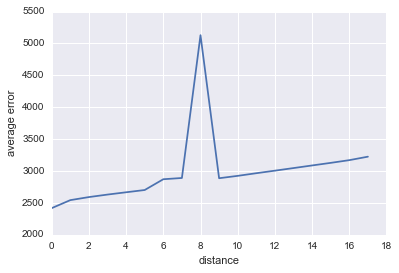

In [85]:
plt.figure()
plt.plot(err)
plt.xlabel('distance')
plt.ylabel('average error')

We see on average, error is increasing as the similarity decreases

### Test

In [86]:
test_df = pd.read_csv('test.csv')

In [88]:
test_df.shape

(125546, 131)

This is a nonparametric algorithm, for each query data, we need to iterate all the training set to find the closest k points. It's really expensive! 5000 query points take about 10 hourse..